# Linear Regression Task

## Background

In modern agriculture, the integration of physical sensor data with artificial intelligence enables precise, data-driven decision-making. Smart farming systems collect real-time measurements such as soil moisture, temperature, and humidity, which can be analyzed using machine learning models to optimize irrigation, resource allocation, and crop yield. This project uses a dataset of agricultural sensor readings to build predictive models that help farmers maximize harvest output while minimizing waste and manual guesswork. The goal is to demonstrate how AI and IoT together support sustainable, efficient farming practices.

## Mission Overview

To leverage real-time agricultural sensor data and machine learning to support farmers in making data-driven decisions that optimize crop yield, resource usage, and sustainability.

## Problem Description

Traditional farming largely relies on experience-based decision-making, leading to inefficiencies in irrigation, inconsistent yield outcomes, and limited insight into environmental factors influencing plant growth. Without quantitative data, farmers struggle to accurately forecast yield or adjust farming operations proactively.

## Solution
This project utilizes IoT sensor data and predictive machine learning models—specifically Linear Regression, Decision Trees, and Random Forest—to estimate crop yield based on environmental conditions such as soil moisture, humidity, and temperature. The final model is deployed through a FastAPI service and integrated into a mobile application, enabling farmers to input real-time values and receive instant yield predictions.

## 1. Import Necessary Packages

In [1]:
## 1. Import Necessary Packages
# Data Manipulation and visualization packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model creation packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Saving model package
import pickle
import joblib

# Import kaggle for loading data
import kagglehub


## 2. Read The data

In [2]:
# Data path from kagglehub and download dataset
path = kagglehub.dataset_download("atharvasoundankar/smart-farming-sensor-data-for-yield-prediction")

# Read Data
data = pd.read_csv(f'{path}/Smart_Farming_Crop_Yield_2024.csv')

# View data
data

100%|██████████| 27.7k/27.7k [00:00<00:00, 27.8MB/s]

Extracting files...


,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,FARM0496,Central USA,Rice,42.85,6.70,30.85,52.35,79.58,7.25,Manual,...,2024-01-16,2024-06-02,138,4251.40,SENS0496,2024-05-08,30.386623,76.147700,0.59,Mild
496,FARM0497,North India,Soybean,34.22,6.75,17.46,256.23,45.14,5.78,NaN,...,2024-01-01,2024-04-14,104,3708.54,SENS0497,2024-01-19,18.832748,75.736924,0.85,Severe
497,FARM0498,North India,Cotton,15.93,5.72,17.03,288.96,57.87,7.69,Drip,...,2024-01-02,2024-05-09,128,2604.41,SENS0498,2024-04-20,23.262016,81.992230,0.71,Mild
498,FARM0499,Central USA,Soybean,38.61,6.20,17.08,279.06,73.09,9.60,Drip,...,2024-01-25,2024-06-04,131,2586.36,SENS0499,2024-03-02,19.764989,84.426869,0.77,Severe


## 3. Analyze Data to understand

In [ ]:
# check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
soil_moisture_%,500.0,26.750140,10.150053,10.160000,17.890000,25.855000,36.022500,44.980000
soil_pH,500.0,6.523980,0.585558,5.510000,6.030000,6.530000,7.040000,7.500000
temperature_C,500.0,24.675740,5.348899,15.000000,20.295000,24.655000,29.090000,34.840000
rainfall_mm,500.0,181.685740,72.293091,50.170000,119.217500,191.545000,239.035000,298.960000
humidity_%,500.0,65.194460,14.642849,40.230000,51.865000,65.685000,77.995000,90.000000
sunlight_hours,500.0,7.030140,1.691670,4.010000,5.667500,6.995000,8.470000,10.000000
pesticide_usage_ml,500.0,26.586980,13.202429,5.050000,14.945000,25.980000,38.005000,49.940000
total_days,500.0,119.496000,16.798046,90.000000,105.750000,119.000000,134.000000,150.000000
yield_kg_per_hectare,500.0,4032.926940,1174.433040,2023.560000,2994.820000,4071.690000,5062.110000,5998.290000
latitude,500.0,22.442473,7.283492,10.004243,16.263202,21.981743,28.528948,34.981531


In [3]:
# Check individual column and the target column
data[['humidity_%','temperature_C', 'yield_kg_per_hectare']].describe()

,humidity_%,temperature_C,yield_kg_per_hectare
count,500.000000,500.000000,500.00000
mean,65.194460,24.675740,4032.92694
std,14.642849,5.348899,1174.43304
min,40.230000,15.000000,2023.56000
25%,51.865000,20.295000,2994.82000
50%,65.685000,24.655000,4071.69000
75%,77.995000,29.090000,5062.11000
max,90.000000,34.840000,5998.29000


In [4]:
data['region'].value_counts()

,count
region,
Central USA,109
East Africa,107
North India,99
South USA,94
South India,91


## 4. Data Visualization & Interpretation

### 4.1 Univariate Visualizations (Meaningful)

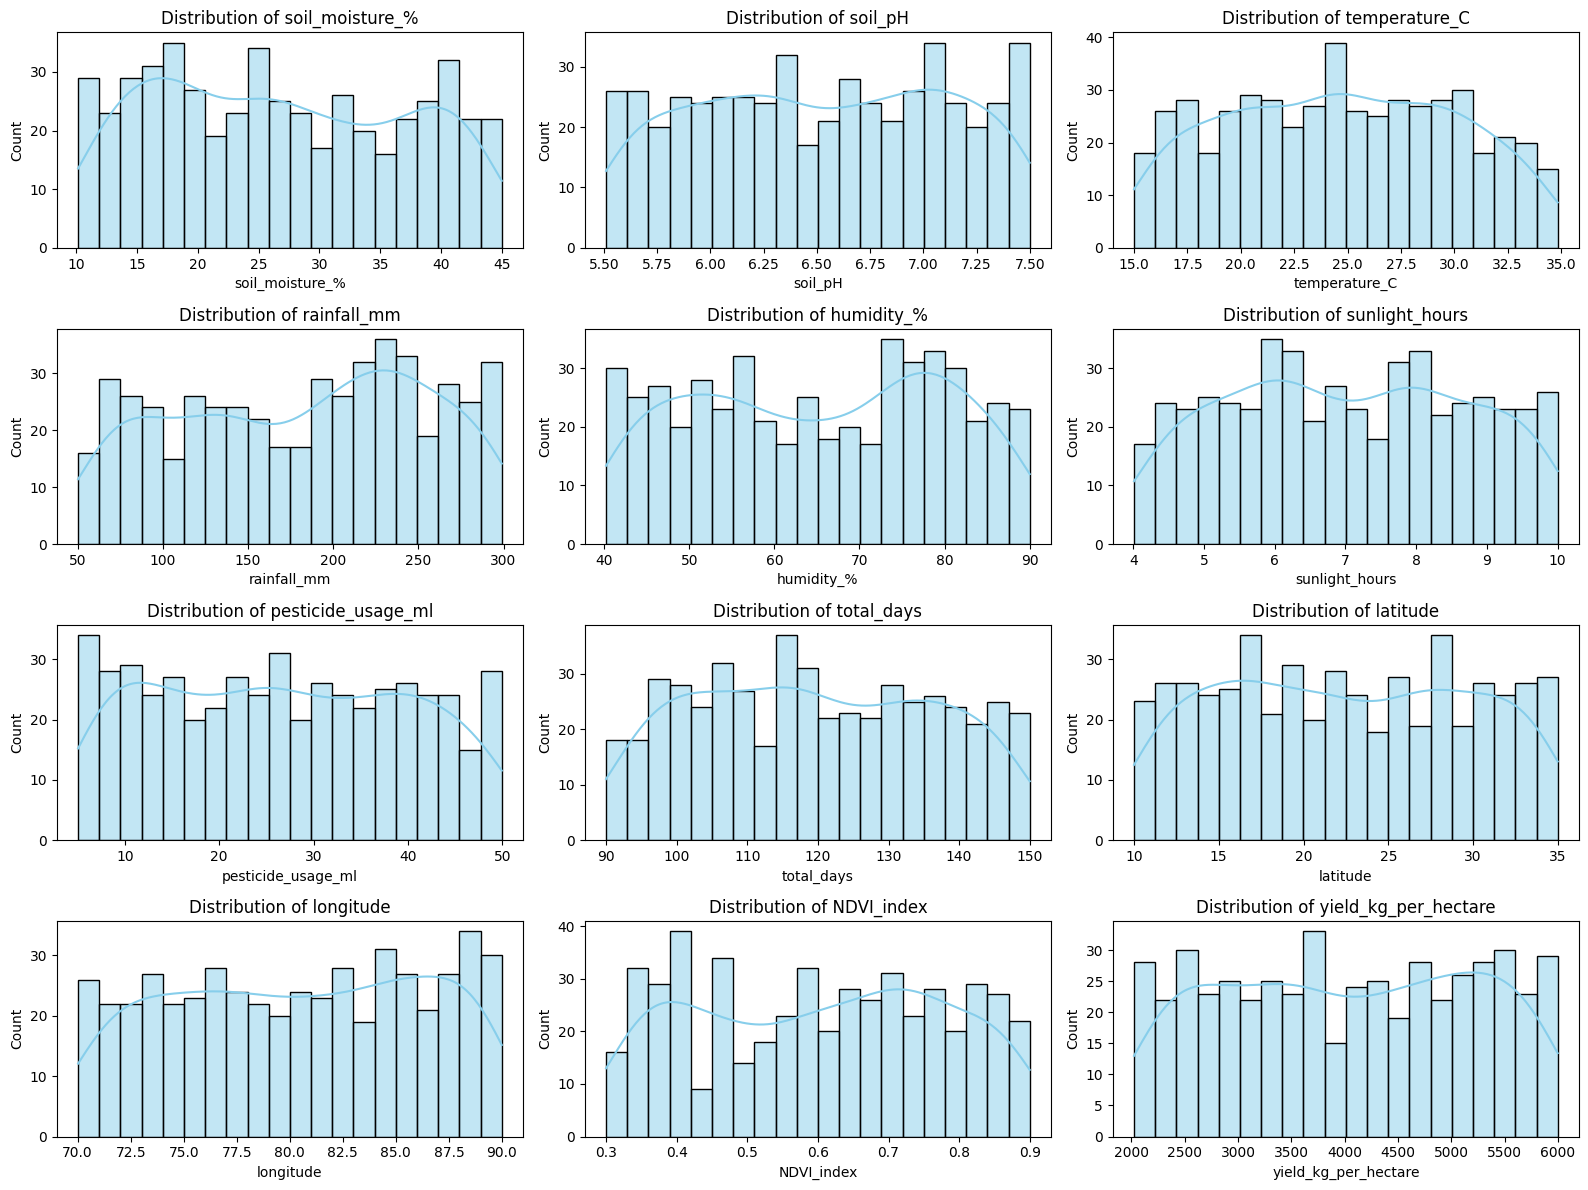

In [5]:
# continuous features for histograms
continuous_features = [
    'soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm',
    'humidity_%', 'sunlight_hours', 'pesticide_usage_ml',
    'total_days', 'latitude', 'longitude', 'NDVI_index', 'yield_kg_per_hectare'
]

plt.figure(figsize=(16, 12))
for i, col in enumerate(continuous_features):
  plt.subplot(4, 3, i+1)
  sns.histplot(data[col], kde=True, bins=20, color='skyblue')
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### 4.2 Correlation Analysis

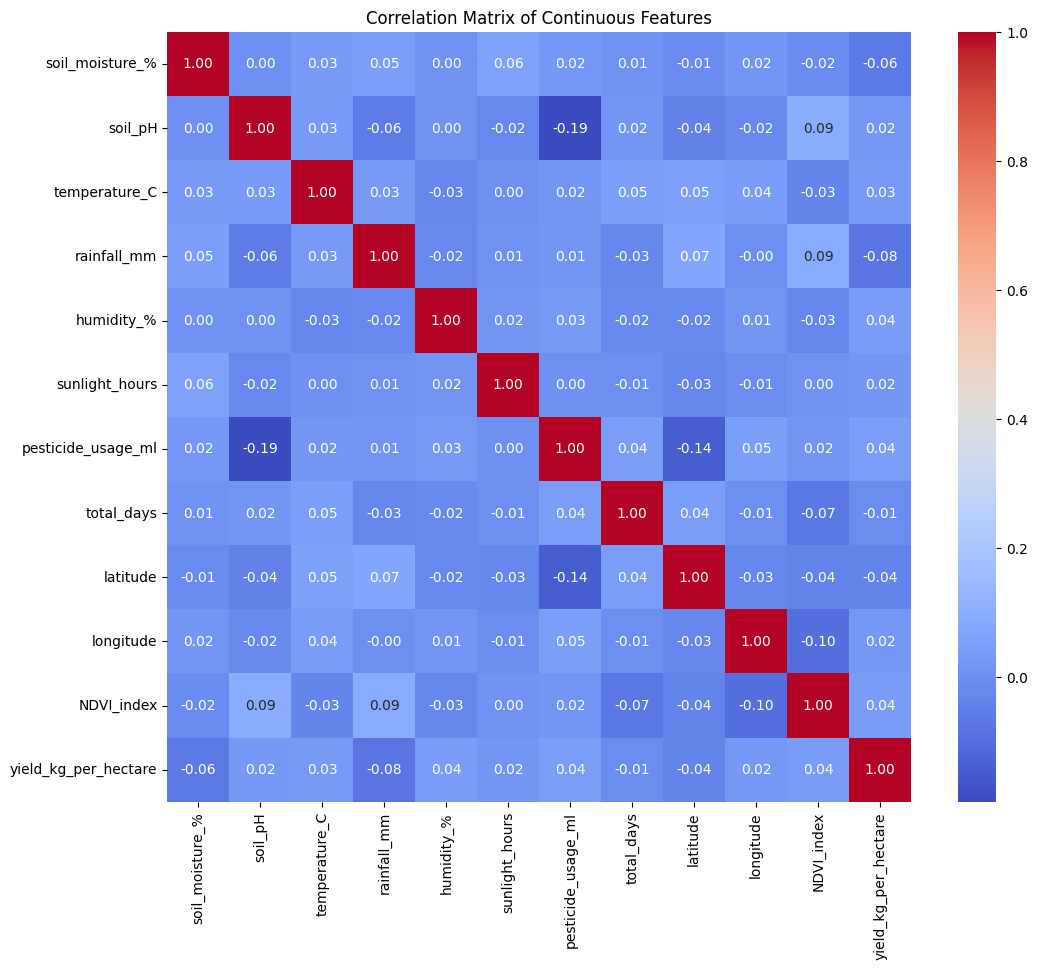

In [ ]:
# Compute correlation matrix for continuous variables
corr_matrix = data[continuous_features].corr()

# Display correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Continuous Features')
plt.show()

In [6]:
# Compute correlation of continuous features with target
target = 'yield_kg_per_hectare'

# Compute correlations with target
corr_with_target = data[continuous_features].corr()[target].sort_values(ascending=False)

# Print correlations
print("Correlation of features with target (yield_kg_per_hectare):\n")
print(corr_with_target)

Correlation of features with target (yield_kg_per_hectare):

yield_kg_per_hectare    1.000000
pesticide_usage_ml      0.041290
humidity_%              0.039021
NDVI_index              0.038099
temperature_C           0.027875
soil_pH                 0.024274
longitude               0.022359
sunlight_hours          0.020284
total_days             -0.007570
latitude               -0.038127
soil_moisture_%        -0.063038
rainfall_mm            -0.076802
Name: yield_kg_per_hectare, dtype: float64


## 5. Feature Engineering
In this step we clean our data, convert categorical cols to numeric cols, select relevant columns


### 5.1 Handling Missing Data
check for null values and if present replace
Continuous:
- mean/median/mode for numeric
- Unknown category for categorical col

In [7]:
# check for null values and if present replace with mean for numeric
data.isnull().sum()

,0
farm_id,0
region,0
crop_type,0
soil_moisture_%,0
soil_pH,0
temperature_C,0
rainfall_mm,0
humidity_%,0
sunlight_hours,0
irrigation_type,150


In [8]:
# Check the category for nan in unique and replace it with Unknown
data['irrigation_type'].unique()
data['irrigation_type'] = data['irrigation_type'].fillna('Unknown')

In [9]:
data['irrigation_type'].unique()

array(['Unknown', 'Sprinkler', 'Drip', 'Manual'], dtype=object)

In [10]:
# Check the category for nan in unique and replace it with Unknown
data['crop_disease_status'].unique()
data['crop_disease_status'] = data['crop_disease_status'].fillna('Unknown')

In [11]:
data['crop_disease_status'].unique()

array(['Mild', 'Unknown', 'Severe', 'Moderate'], dtype=object)

In [12]:
data.isnull().sum()

,0
farm_id,0
region,0
crop_type,0
soil_moisture_%,0
soil_pH,0
temperature_C,0
rainfall_mm,0
humidity_%,0
sunlight_hours,0
irrigation_type,0


### 5.2 Convert Categorical → Numeric, Also drop irrelevant cols

In [13]:
# Separate X and Y
X = data.drop(columns=['yield_kg_per_hectare'], axis=1)
Y = data['yield_kg_per_hectare']

In [14]:
# Remove irrelevant columns such as date and ID's - cols to be removed
cols_to_droped = ['latitude', 'longitude', 'NDVI_index', 'farm_id', 'sowing_date', 'harvest_date','sensor_id', 'timestamp']

# Remove the irrelevant cols defined above
X = X.drop(columns=cols_to_droped, axis=1)

### Note: Why Drop The columns below
Most of these columns are do not affect the target variable, even though they might have higer corr with target, however, correlation does not equal causation, hence they do not add any value or meaing on their Own
['latitude', 'longitude', 'NDVI_index', 'farm_id', 'sowing_date', 'harvest_date','sensor_id', 'timestamp']

In [15]:
len(X.columns)

13

In [16]:
# Columns needed for the app or prediction
X.columns

Index(['region', 'crop_type', 'soil_moisture_%', 'soil_pH', 'temperature_C',
       'rainfall_mm', 'humidity_%', 'sunlight_hours', 'irrigation_type',
       'fertilizer_type', 'pesticide_usage_ml', 'total_days',
       'crop_disease_status'],
      dtype='object')

In [17]:
#Save the columns needed before encoding to use in the UI as reference
  ## These columns are the final inputs for our model
cols_for_ui = X.columns
joblib.dump(cols_for_ui, "UI_columns.pkl")

['UI_columns.pkl']

In [18]:
# Select Numeircal Cols
numeric_cols = X.select_dtypes(include='number')
len(numeric_cols)

500

In [19]:
# Select categorical cols
categoric_cols = X.select_dtypes(exclude='number')
len(categoric_cols)

500

In [ ]:
categoric_cols.columns

Index(['region', 'crop_type', 'irrigation_type', 'fertilizer_type',
       'crop_disease_status'],
      dtype='object')

In [20]:
# Use pd.get_dummies to convert categorical cols to numeric cols
X = pd.get_dummies(X, columns=categoric_cols.columns)
X

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,region_Central USA,region_East Africa,...,irrigation_type_Manual,irrigation_type_Sprinkler,irrigation_type_Unknown,fertilizer_type_Inorganic,fertilizer_type_Mixed,fertilizer_type_Organic,crop_disease_status_Mild,crop_disease_status_Moderate,crop_disease_status_Severe,crop_disease_status_Unknown
0,35.95,5.99,17.79,75.62,77.03,7.27,6.34,122,False,False,...,False,False,True,False,False,True,True,False,False,False
1,19.74,7.24,30.18,89.91,61.13,5.67,9.60,112,False,False,...,False,True,False,True,False,False,False,False,False,True
2,29.32,7.16,27.37,265.43,68.87,8.23,15.26,144,False,False,...,False,False,False,False,True,False,True,False,False,False
3,17.33,6.03,33.73,212.01,70.46,5.03,25.80,134,True,False,...,False,True,False,False,False,True,False,False,False,True
4,19.37,5.92,33.86,269.09,55.73,7.93,25.65,105,True,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,42.85,6.70,30.85,52.35,79.58,7.25,8.82,138,True,False,...,True,False,False,False,True,False,True,False,False,False
496,34.22,6.75,17.46,256.23,45.14,5.78,5.05,104,False,False,...,False,False,True,False,False,True,False,False,True,False
497,15.93,5.72,17.03,288.96,57.87,7.69,46.55,128,False,False,...,False,False,False,True,False,False,True,False,False,False
498,38.61,6.20,17.08,279.06,73.09,9.60,43.78,131,True,False,...,False,False,False,False,False,True,False,False,True,False


In [21]:
X.columns

Index(['soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm',
       'humidity_%', 'sunlight_hours', 'pesticide_usage_ml', 'total_days',
       'region_Central USA', 'region_East Africa', 'region_North India',
       'region_South India', 'region_South USA', 'crop_type_Cotton',
       'crop_type_Maize', 'crop_type_Rice', 'crop_type_Soybean',
       'crop_type_Wheat', 'irrigation_type_Drip', 'irrigation_type_Manual',
       'irrigation_type_Sprinkler', 'irrigation_type_Unknown',
       'fertilizer_type_Inorganic', 'fertilizer_type_Mixed',
       'fertilizer_type_Organic', 'crop_disease_status_Mild',
       'crop_disease_status_Moderate', 'crop_disease_status_Severe',
       'crop_disease_status_Unknown'],
      dtype='object')

### Note:
  When i used pd.dummies for the whole dataset, Because all the categories were present in curtain categorical column, it created many columns than when i used one record for prediction which would have only one category for a curtain categorical col. So i needed to refer to these columns to recreate and populate the columns missing with 0

In [ ]:
#Save the columns needed after encoding to use in prediction
cols_for_pred = X.columns
joblib.dump(cols_for_pred, "prediction_columns.pkl")

['prediction_columns.pkl']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   soil_moisture_%               500 non-null    float64
 1   soil_pH                       500 non-null    float64
 2   temperature_C                 500 non-null    float64
 3   rainfall_mm                   500 non-null    float64
 4   humidity_%                    500 non-null    float64
 5   sunlight_hours                500 non-null    float64
 6   pesticide_usage_ml            500 non-null    float64
 7   total_days                    500 non-null    int64  
 8   region_Central USA            500 non-null    bool   
 9   region_East Africa            500 non-null    bool   
 10  region_North India            500 non-null    bool   
 11  region_South India            500 non-null    bool   
 12  region_South USA              500 non-null    bool   
 13  crop_

In [22]:
# X_encoded is the final training DataFrame after all encoding
model_columns = X.columns.tolist()  # column order
model_dtypes = X.dtypes.to_dict()   # column types

# Save for later use (When making a prediction on one record)
joblib.dump(model_columns, 'model_columns.pkl')
joblib.dump(model_dtypes, 'model_dtypes.pkl')

['model_dtypes.pkl']

## 6. Data Standardization


In [23]:
# Split your data into train and test size of 0.8:0.2 ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

In [24]:
# Define the scaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [25]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## 8. Model Building

### 8.1 Linear Regression (sklearn)

In [26]:
# Train model
lr_model = LinearRegression()
# Fit model
lr_model.fit(x_train, y_train)

LinearRegression()

In [27]:
# Print coefficients
coef_df = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': lr_model.coef_})
print("Linear Regression Coefficients:")
print(coef_df)

Linear Regression Coefficients:
                         Feature  Coefficient
0                soil_moisture_%    -8.887602
1                        soil_pH   -48.339906
2                  temperature_C    15.210909
3                    rainfall_mm    -1.532852
4                     humidity_%     4.311301
5                 sunlight_hours    16.925307
6             pesticide_usage_ml    -0.135450
7                     total_days    -1.564116
8             region_Central USA   -24.106354
9             region_East Africa   -13.034418
10            region_North India   -12.783873
11            region_South India    38.775408
12              region_South USA    11.149237
13              crop_type_Cotton   -43.634256
14               crop_type_Maize   -92.274951
15                crop_type_Rice   -49.186042
16             crop_type_Soybean   257.494795
17               crop_type_Wheat   -72.399546
18          irrigation_type_Drip    -7.717802
19        irrigation_type_Manual    47.926464
20

In [28]:
# Predictions
y_train_pred = lr_model.predict(x_train_scaled)
y_test_pred = lr_model.predict(x_test_scaled)


# Evaluation
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print(f"Linear Regression Train RMSE: {train_rmse:.2f}, R2: {train_r2:.2f}")
print(f"Linear Regression Test RMSE: {test_rmse:.2f}, R2: {test_r2:.2f}")

Linear Regression Train RMSE: 1221.89, R2: -0.06
Linear Regression Test RMSE: 1254.57, R2: -0.28


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


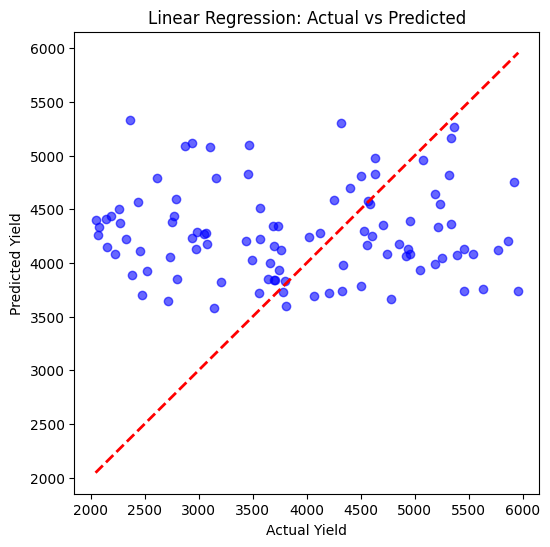

In [29]:
# Scatter plot with fitted line (target vs prediction)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

### 8.2 Linear Regression with Gradient Descent (SGDRegressor)

### 8.3 Decision Tree Regressor

In [30]:
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model
dt_model.fit(x_train_scaled, y_train)


DecisionTreeRegressor(random_state=42)

In [31]:
# Predict for data used in training and testing
y_train_dt = dt_model.predict(x_train_scaled)
y_test_dt = dt_model.predict(x_test_scaled)

In [32]:
train_rmse_dt = root_mean_squared_error(y_train, y_train_dt)
test_rmse_dt = root_mean_squared_error(y_test, y_test_dt)
train_r2_dt = r2_score(y_train, y_train_dt)
test_r2_dt = r2_score(y_test, y_test_dt)

print(f"Decision Tree Train MSE: {train_rmse_dt:.2f}, R2: {train_r2_dt:.2f}")
print(f"Decision Tree Test MSE: {test_rmse_dt:.2f}, R2: {test_r2_dt:.2f}")

Decision Tree Train MSE: 0.00, R2: 1.00
Decision Tree Test MSE: 1600.69, R2: -1.08


### 8.4 Random Forest Regressor

In [33]:
# model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=41)
# fit it
rf_model.fit(x_train_scaled, y_train)

RandomForestRegressor(n_estimators=1000, random_state=41)

In [34]:
# Predict
y_train_rf = rf_model.predict(x_train_scaled)
y_test_rf = rf_model.predict(x_test_scaled)

In [35]:
# Compute RMSE and r2 score
train_rmse_rf = root_mean_squared_error(y_train, y_train_rf)
test_rmse_rf = root_mean_squared_error(y_test, y_test_rf)
train_r2_rf = r2_score(y_train, y_train_rf)
test_r2_rf = r2_score(y_test, y_test_rf)

In [36]:
print(f"Random Forest Train RMSE: {train_rmse_rf:.2f}, R2: {train_r2_rf:.2f}")
print(f"Random Forest Test RMSE: {test_rmse_rf:.2f}, R2: {test_r2_rf:.2f}")

Random Forest Train RMSE: 448.34, R2: 0.86
Random Forest Test RMSE: 1095.35, R2: 0.02


## 9. Model Comparison

In [39]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Train RMSE': [train_rmse, train_rmse_dt, train_rmse_rf],
    'Test RMSE': [test_rmse, test_rmse_dt, test_rmse_rf],
    'Train R2': [train_r2, train_r2_dt, train_r2_rf],
    'Test R2': [test_r2, test_r2_dt, test_r2_rf]
})

print("\nModel Comparison:")
print(comparison)

# Select best model based on lowest Test MSE
best_model_index = comparison['Test RMSE'].idxmin()
best_model_name = comparison.loc[best_model_index, 'Model']
print(f"\nBest Model: {best_model_name}")


Model Comparison:
               Model   Train RMSE    Test RMSE  Train R2   Test R2
0  Linear Regression  1221.892185  1254.573605 -0.061966 -0.279683
1      Decision Tree     0.000000  1600.691626  1.000000 -1.083174
2      Random Forest   448.336225  1095.353878  0.857027  0.024519

Best Model: Random Forest


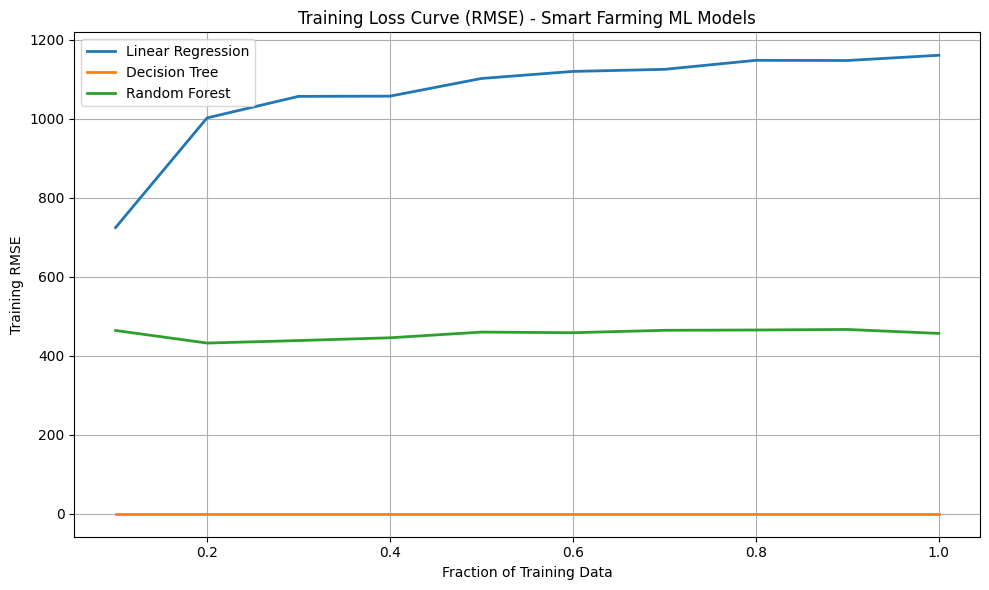

In [40]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}


plt.figure(figsize=(10,6))

# Loop over models to calculate training loss curve
for name, model in models.items():
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_errors = []

    for size in train_sizes:
        # Sample subset of training data
        n_samples = int(size * x_train.shape[0])
        X_subset = x_train[:n_samples]
        y_subset = y_train[:n_samples]

        # Fit model
        model.fit(X_subset, y_subset)
        y_train_pred = model.predict(X_subset)

        # Compute RMSE for this subset
        rmse = root_mean_squared_error(y_subset, y_train_pred)
        train_errors.append(rmse)

    plt.plot(train_sizes, train_errors, label=name, linewidth=2)

plt.title("Training Loss Curve (RMSE) - Smart Farming ML Models")
plt.xlabel("Fraction of Training Data")
plt.ylabel("Training RMSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 10. Save the Best Model

In [41]:
# 10. Save the Best Model
# ---------------------------
# Map model names to objects
model_dict = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

best_model = model_dict[best_model_name]

# Save model
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved as best_model.pkl")

Best model saved as best_model.pkl


## 11. Load Saved Model and Make a Prediction

### 11.1 Load Model

In [ ]:
# Load saved model
model = joblib.load('/content/best_model.pkl')

In [ ]:
# Load the scaler used for training features
scaler = joblib.load('scaler.pkl')

In [ ]:
# Load both the UI and prediction columns
ui_columns = joblib.load('UI_columns.pkl')
model_cols = joblib.load('model_columns.pkl')
model_dtype = joblib.load('model_dtypes.pkl')

In [ ]:
# Confirm cols number and data types
len(model_dtype)

29

In [ ]:
ui_columns

Index(['region', 'crop_type', 'soil_moisture_%', 'soil_pH', 'temperature_C',
       'rainfall_mm', 'humidity_%', 'sunlight_hours', 'irrigation_type',
       'fertilizer_type', 'pesticide_usage_ml', 'total_days',
       'crop_disease_status'],
      dtype='object')

In [ ]:
model_dtype

{'soil_moisture_%': dtype('float64'),
 'soil_pH': dtype('float64'),
 'temperature_C': dtype('float64'),
 'rainfall_mm': dtype('float64'),
 'humidity_%': dtype('float64'),
 'sunlight_hours': dtype('float64'),
 'pesticide_usage_ml': dtype('float64'),
 'total_days': dtype('int64'),
 'region_Central USA': dtype('bool'),
 'region_East Africa': dtype('bool'),
 'region_North India': dtype('bool'),
 'region_South India': dtype('bool'),
 'region_South USA': dtype('bool'),
 'crop_type_Cotton': dtype('bool'),
 'crop_type_Maize': dtype('bool'),
 'crop_type_Rice': dtype('bool'),
 'crop_type_Soybean': dtype('bool'),
 'crop_type_Wheat': dtype('bool'),
 'irrigation_type_Drip': dtype('bool'),
 'irrigation_type_Manual': dtype('bool'),
 'irrigation_type_Sprinkler': dtype('bool'),
 'irrigation_type_Unknown': dtype('bool'),
 'fertilizer_type_Inorganic': dtype('bool'),
 'fertilizer_type_Mixed': dtype('bool'),
 'fertilizer_type_Organic': dtype('bool'),
 'crop_disease_status_Mild': dtype('bool'),
 'crop_disea

In [ ]:
# Take the first row of original dataset (raw, unscaled)
# keep as DataFrame
new_row = data.iloc[[0]]
y_new = new_row['yield_kg_per_hectare']
new_row = new_row.drop('yield_kg_per_hectare', axis=1)
print(new_row)
print(y_new)


    farm_id       region crop_type  soil_moisture_%  soil_pH  temperature_C  \
0  FARM0001  North India     Wheat            35.95     5.99          17.79   

   rainfall_mm  humidity_%  sunlight_hours irrigation_type  ...  \
0        75.62       77.03            7.27         Unknown  ...   

  pesticide_usage_ml  sowing_date harvest_date total_days  sensor_id  \
0               6.34   2024-01-08   2024-05-09        122   SENS0001   

    timestamp   latitude  longitude  NDVI_index  crop_disease_status  
0  2024-03-19  14.970941  82.997689        0.63                 Mild  

[1 rows x 21 columns]
0    4408.07
Name: yield_kg_per_hectare, dtype: float64


In [ ]:
# Analyze
new_row.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   farm_id              1 non-null      object 
 1   region               1 non-null      object 
 2   crop_type            1 non-null      object 
 3   soil_moisture_%      1 non-null      float64
 4   soil_pH              1 non-null      float64
 5   temperature_C        1 non-null      float64
 6   rainfall_mm          1 non-null      float64
 7   humidity_%           1 non-null      float64
 8   sunlight_hours       1 non-null      float64
 9   irrigation_type      1 non-null      object 
 10  fertilizer_type      1 non-null      object 
 11  pesticide_usage_ml   1 non-null      float64
 12  sowing_date          1 non-null      object 
 13  harvest_date         1 non-null      object 
 14  total_days           1 non-null      int64  
 15  sensor_id            1 non-null      object 
 16 

In [ ]:
# Repeat the same processing we used before
# 1. Drop cols not used in training (Select UI columns only)
new_row = new_row[ui_columns]
len(new_row.columns)

13

In [ ]:
# 2. Convert categorical cols to numeric
new_row_encoded = pd.get_dummies(new_row)
len(new_row_encoded.columns)

13

In [ ]:
# Verify if encoded
new_row_encoded

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,region_North India,crop_type_Wheat,irrigation_type_Unknown,fertilizer_type_Organic,crop_disease_status_Mild
0,35.95,5.99,17.79,75.62,77.03,7.27,6.34,122,True,True,True,True,True


In [ ]:
# 3. Add missing columns with 0
for col in prediction_cols:
    if col not in new_row_encoded.columns:
        new_row_encoded[col] = 0



In [ ]:
# Verify if added
new_row_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   soil_moisture_%               1 non-null      float64
 1   soil_pH                       1 non-null      float64
 2   temperature_C                 1 non-null      float64
 3   rainfall_mm                   1 non-null      float64
 4   humidity_%                    1 non-null      float64
 5   sunlight_hours                1 non-null      float64
 6   pesticide_usage_ml            1 non-null      float64
 7   total_days                    1 non-null      int64  
 8   region_North India            1 non-null      bool   
 9   crop_type_Wheat               1 non-null      bool   
 10  irrigation_type_Unknown       1 non-null      bool   
 11  fertilizer_type_Organic       1 non-null      bool   
 12  crop_disease_status_Mild      1 non-null      bool   
 13  region_Central

In [ ]:
# 4. Re-Order to match training data order
df = new_row_encoded[[col for col in model_columns]]  # reorder

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   soil_moisture_%               1 non-null      float64
 1   soil_pH                       1 non-null      float64
 2   temperature_C                 1 non-null      float64
 3   rainfall_mm                   1 non-null      float64
 4   humidity_%                    1 non-null      float64
 5   sunlight_hours                1 non-null      float64
 6   pesticide_usage_ml            1 non-null      float64
 7   total_days                    1 non-null      int64  
 8   region_Central USA            1 non-null      int64  
 9   region_East Africa            1 non-null      int64  
 10  region_North India            1 non-null      bool   
 11  region_South India            1 non-null      int64  
 12  region_South USA              1 non-null      int64  
 13  crop_type_Cott

In [ ]:
# 5. Standardize data
df_scaled = scaler.transform(df)

In [ ]:
# 6. Make prediction and compare results
predicted_yield = model.predict(df_scaled)
print(f"Predicted yield (kg per hectare): {predicted_yield[0]:.2f}")
print()

Predicted yield (kg per hectare): 4357.89



In [ ]:
# Actual Y
y_new

,yield_kg_per_hectare
0,4408.07


In [ ]:
# SECOND PREDICTION

# Get Data
row_100 = data.iloc[[100]]  # keep as DataFrame
y_row_100 = row_100['yield_kg_per_hectare']
x_row_100 = row_100.drop('yield_kg_per_hectare', axis=1)
print(x_row_100)
print(y_row_100)

      farm_id       region crop_type  soil_moisture_%  soil_pH  temperature_C  \
100  FARM0101  Central USA   Soybean            26.95     7.41          20.58   

     rainfall_mm  humidity_%  sunlight_hours irrigation_type  ...  \
100       124.62       87.07            9.89          Manual  ...   

    pesticide_usage_ml  sowing_date harvest_date total_days  sensor_id  \
100              14.33   2024-03-16   2024-07-04        110   SENS0101   

      timestamp   latitude  longitude  NDVI_index  crop_disease_status  
100  2024-05-26  33.342509  85.908107        0.46              Unknown  

[1 rows x 21 columns]
100    3919.21
Name: yield_kg_per_hectare, dtype: float64


In [ ]:
# 2. Select Relevant cols only
df_test = x_row_100[ui_columns]
len(df_test.columns)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 100 to 100
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region               1 non-null      object 
 1   crop_type            1 non-null      object 
 2   soil_moisture_%      1 non-null      float64
 3   soil_pH              1 non-null      float64
 4   temperature_C        1 non-null      float64
 5   rainfall_mm          1 non-null      float64
 6   humidity_%           1 non-null      float64
 7   sunlight_hours       1 non-null      float64
 8   irrigation_type      1 non-null      object 
 9   fertilizer_type      1 non-null      object 
 10  pesticide_usage_ml   1 non-null      float64
 11  total_days           1 non-null      int64  
 12  crop_disease_status  1 non-null      object 
dtypes: float64(7), int64(1), object(5)
memory usage: 112.0+ bytes


In [ ]:
cat = ['region', 'crop_type', 'irrigation_type', 'fertilizer_type', 'crop_disease_status']

df_test_encoded = pd.get_dummies(df_test, columns=categoric_cols.columns)
df_test_encoded

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,region_Central USA,crop_type_Soybean,irrigation_type_Manual,fertilizer_type_Mixed,crop_disease_status_Unknown
100,26.95,7.41,20.58,124.62,87.07,9.89,14.33,110,True,True,True,True,True
